In [268]:
import pandas as pd
from pandas import ExcelWriter, ExcelFile
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

In [269]:
# TODO: sheet_name change
original_df = pd.read_excel('test.xlsx', sheet_name='Taxv3')

In [270]:
df = original_df.iloc[3:]
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.iloc[:31]
df = df.iloc[:, 2:-8]
df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
4,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,Yes,No
5,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,No,Yes
6,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,Yes,Services,No,Yes
7,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,Very,Yes,Services,Yes,No
8,Open,Profit from Tokens,No,Anonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Amount of Tokens owned,No,Tokens Owned,None,None,Yes,Services,Yes,No
9,Open,Profit from Tokens,No,Pseudonymous,REP Token,Product Building and Management,Primary and Reputation,ERC20,Yes,Ownership,...,Manual,None,Yes,Tokens Owned,None,Some,No,Services,No,Yes
10,Open,Community,No,Pseudonymous,Other Tokens,Product Building and Management,Singular,ERC20,No,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,Very,No,Token Sales,Yes,No
11,Open,Decider,No,Anonymous,Other Tokens,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,Some,No,Investment Returns,No,No
12,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,Yes,No
13,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,NaN,NaN,NaN


In [271]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df).toarray())

In [272]:
clustering = AgglomerativeClustering(n_clusters=4).fit(encoder_df)
clustering.labels_

array([0, 1, 1, 0, 0, 0, 1, 0, 3, 3, 3, 3, 1, 0, 2, 2, 2, 0, 0, 0, 3, 3,
       3, 0, 0, 1, 1, 1, 0, 0, 0])

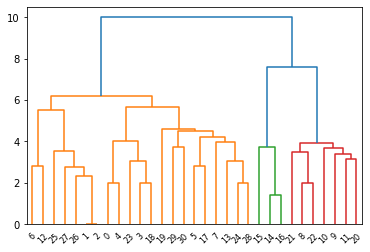

In [273]:
dend = shc.dendrogram(shc.linkage(encoder_df, method='ward'))

In [274]:
zero_df = pd.DataFrame(columns=df.columns)
one_df = pd.DataFrame(columns=df.columns)
two_df = pd.DataFrame(columns=df.columns)
three_df = pd.DataFrame(columns=df.columns)
for id, value in enumerate(clustering.labels_):
    if value == 0:
        zero_df = pd.concat([zero_df, df.iloc[[id]]])
    if value == 1:
        one_df = pd.concat([one_df, df.iloc[[id]]])
    if value == 2:
        two_df = pd.concat([two_df, df.iloc[[id]]])
    if value == 3:
        three_df = pd.concat([three_df, df.iloc[[id]]])
three_df

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
12,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,Yes,No
13,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,None,None,No,NaN,NaN,NaN
14,Token Ownership,Communiy,Yes,Pseudonymous,Governance Token,Community Building and Engagement,Singular,ERC20,Yes,Token + Application,...,Manual,Whitelist,No,Tokens Owned,None,None,No,Token Sales,No,Yes
15,Token Ownership,Profit from Tokens,No,Pseudonymous,Other Tokens,Investing or Fund Raising,Singular,ERC20,Yes,Ownership,...,Manual,None,No,Tokens Owned,None,None,No,Token Sales,Yes,Yes
24,Token Ownership,Community,No,Pseudonymous,Governance Token,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,None,No,Tokens Owned,None,None,No,Token Sales,No,No
25,Token Ownership,Community,No,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC721,Yes,Ownership,...,Manual,Whitelist,No,Tokens Owned,Per Address,Very,No,Token Sales,No,No
26,Token Ownership,Community,Yes,Pseudonymous,Other Tokens,Community Building and Engagement,Singular,ERC20,Yes,Ownership,...,Manual,Amount of Tokens owned,No,Tokens Owned,None,Very,No,Token Sales,Yes,No


In [275]:
one_df.mode()

3,Access,Type,Is hierachical,Anonymity,Contributor Rewards,Purpose,Token Type,Primary Type,Supply Cap,Entry Barriers,...,Execution,has Proposal Creation Restricted,is fully On-Chain,Power,Limits,Diversification,Stakes Tokens,Capital Gain,Initial Airdrop,Initial Token Sale
0,Open,Profit from Tokens,No,Pseudonymous,Governance Token,Product Building and Management,Singular,ERC20,Yes,Ownership,...,Automatic,Amount of Tokens owned,Yes,Tokens Owned,None,None,No,Services,No,Yes


In [276]:
per_zero = int(np.floor(len(zero_df)/31*100))
per_one = int(np.floor(len(one_df)/31*100))
per_two = int(np.floor(len(two_df)/31*100))
per_three = int(np.floor(len(three_df)/31*100))

In [277]:
final_df = pd.concat([zero_df.mode(), one_df.mode(), two_df.mode(), three_df.mode()])
final_df = final_df.drop([1])
final_df.index=(f'Cluster1: {per_zero}', f'Cluster2: {per_one}', f'Cluster3: {per_two}', f'Cluster4: {per_three}')
final_df = final_df.transpose()
final_df

,Cluster1: 45,Cluster2: 22,Cluster3: 9,Cluster4: 22
3,,,,
Access,Open,Open,Invitation,Token Ownership
Type,Profit from Tokens,Profit from Tokens,Decider,Community
Is hierachical,No,No,No,No
Anonymity,Anonymous,Pseudonymous,Known,Pseudonymous
Contributor Rewards,Other Tokens,Governance Token,Governance Token,Other Tokens
Purpose,Product Building and Management,Product Building and Management,Investing or Fund Raising,Community Building and Engagement
Token Type,Singular,Singular,Singular,Singular
Primary Type,ERC20,ERC20,ERC20,ERC20
Supply Cap,Yes,Yes,Yes,Yes


In [278]:
final_df.to_excel('output.xlsx', sheet_name='Danke_Ingo')